In [1]:
# Mounting colab on drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
# Enter the folder name
FOLDER_NAME = '/content/drive/My Drive/BTP_Classification/'

Mounted at /content/drive


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv(FOLDER_NAME+"Indoor_room_HI_labels.csv")

In [5]:
data.head()

,S1Temeprature,S1Humidity,S3CO2,S4CO2,S5Temperature,S5Humidity,S5CO2,HI
0,31.5,70.6,674,554,33.51,59.52,444,1
1,31.4,70.4,649,556,33.57,59.36,447,1
2,31.5,70.5,641,558,33.64,59.22,449,1
3,31.5,70.5,634,560,33.67,59.16,449,1
4,31.5,70.4,626,562,33.72,59.07,450,1


In [6]:
data.columns

Index(['S1Temeprature', 'S1Humidity', 'S3CO2', 'S4CO2', 'S5Temperature',
       'S5Humidity', 'S5CO2', 'HI'],
      dtype='object')

In [8]:
data['HI'].value_counts()

3    410
2    327
1    280
Name: HI, dtype: int64

In [9]:
corr = data.corr()

In [10]:
corr

,S1Temeprature,S1Humidity,S3CO2,S4CO2,S5Temperature,S5Humidity,S5CO2,HI
S1Temeprature,1.000000,-0.581880,0.674481,0.654400,0.728736,-0.286698,0.782053,0.426846
S1Humidity,-0.581880,1.000000,-0.117832,-0.350908,-0.772389,0.806685,-0.317848,0.106449
S3CO2,0.674481,-0.117832,1.000000,0.499097,0.443975,-0.018429,0.494871,0.781937
S4CO2,0.654400,-0.350908,0.499097,1.000000,0.449676,-0.137886,0.889192,-0.031283
S5Temperature,0.728736,-0.772389,0.443975,0.449676,1.000000,-0.834605,0.533262,0.206537
S5Humidity,-0.286698,0.806685,-0.018429,-0.137886,-0.834605,1.000000,-0.119544,0.139920
S5CO2,0.782053,-0.317848,0.494871,0.889192,0.533262,-0.119544,1.000000,0.078690
HI,0.426846,0.106449,0.781937,-0.031283,0.206537,0.139920,0.078690,1.000000


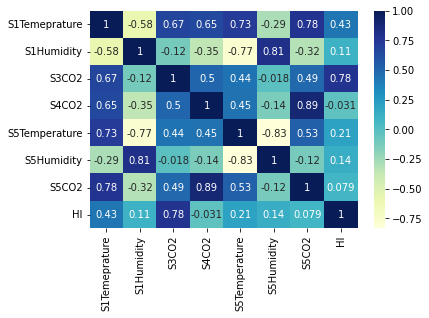

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt

dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
data_y = np.array(data['HI'])
data_x = np.array(data.drop('HI', axis=1))

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1, random_state=42)

### Different classifiers applied on data

In [ ]:
# Naive Bayes classifier

clf = GaussianNB().fit(train_x, train_y)
clf.score(test_x, test_y)

0.9705882352941176

In [ ]:
# Logistic regression

clf = LogisticRegression(random_state=0, solver='liblinear').fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

In [ ]:
# SVM

clf = SVC(C=5, gamma='auto').fit(train_x, train_y)
clf.score(test_x, test_y)

0.8333333333333334

K-Nearest Neighbours with different number of neighbours

In [ ]:
# K-Nearest neighbours classifier

# Number of neighbours - 100
clf = KNeighborsClassifier(n_neighbors=100).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9803921568627451

In [ ]:
# Number of neighbours - 50
clf = KNeighborsClassifier(n_neighbors=50).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9803921568627451

In [ ]:
# Number of neighbours - 25
clf = KNeighborsClassifier(n_neighbors=25).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9803921568627451

In [ ]:
# Number of neighbours - 10
clf = KNeighborsClassifier(n_neighbors=10).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

In [ ]:
# Number of neighbours - 5
clf = KNeighborsClassifier(n_neighbors=5).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

Decision Tree classifier with different depths

In [ ]:
# Decision tree

# With max_depth 1
clf = DecisionTreeClassifier(random_state=0, max_depth=1).fit(train_x, train_y)
clf.score(test_x, test_y)

0.7156862745098039

In [ ]:
# With max_depth 2
clf = DecisionTreeClassifier(random_state=0, max_depth=2).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9803921568627451

In [ ]:
# With max_depth 3
clf = DecisionTreeClassifier(random_state=0, max_depth=3).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

In [ ]:
# With max_depth 5
clf = DecisionTreeClassifier(random_state=0, max_depth=5).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

Random forest classifier with different depth

In [ ]:
# Random Forest Classifier

# With max_depth 1
clf = RandomForestClassifier(max_depth=1, random_state=0).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9705882352941176

In [ ]:
# With max_depth 2
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

In [ ]:
# With max_depth 3
clf = RandomForestClassifier(max_depth=3, random_state=0).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

Catboost classifier with different depths

In [ ]:
# Catboost classifier

# With depth 1
model = CatBoostRegressor(iterations=2, learning_rate=0.05, depth=1).fit(train_x, train_y)
clf.score(test_x, test_y)

0:	learn: 0.7896398	total: 4.78ms	remaining: 4.78ms
1:	learn: 0.7641673	total: 9.03ms	remaining: 0us


0.9901960784313726

In [ ]:
# With depth 2
model = CatBoostRegressor(iterations=2, learning_rate=0.05, depth=2).fit(train_x, train_y)
clf.score(test_x, test_y)

0:	learn: 0.7876752	total: 1.35ms	remaining: 1.35ms
1:	learn: 0.7530308	total: 1.77ms	remaining: 0us


0.9901960784313726

XGboost classifier with different depths

In [ ]:
# XGBoost classifier

# With depth 1
xgb_cl = xgb.XGBClassifier(depth=1).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

In [ ]:
# With depth 2
xgb_cl = xgb.XGBClassifier(depth=2).fit(train_x, train_y)
clf.score(test_x, test_y)

0.9901960784313726

Thus, we can see that highest accuracy achieved on data is ~ 99.02 %